In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
## Import Dataset

df = pd.read_csv("insuranceFraud.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [86]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,10/12/2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,6/4/2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,2/3/1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,2/5/1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,7/25/2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N


### Notes: Sekilas bila melihat hasil dari df.info(), dataset memiliki 39 kolom dengan 1000 baris di semua kolom, yang berarti tidak ada yang null. Namun dari hasil df.head(), terlihat bahwa terdapat data dengan isi berupa karakter "?" yang berarti kolom tersebut memiliki data Null.

### Untuk memastikan apakah ada null atau tidak, maka karakter / isi data yang berisi tidak sesuai, kita ganti menjadi NaN agar terdeteksi oleh Pandas sebagai data yang Null.

In [87]:
missing_value_format = ['N.A', 'na', 'n.a.', 'n/a', '?', '-']

In [88]:
df = pd.read_csv('insuranceFraud.csv', na_values=missing_value_format)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Notes: Dari hasil konversi data di atas, terlihat sekarang bahwa terdapat data yang null di beberapa kolom / attribute dataset

In [75]:
# Menghitung jumlah data yang Null di setiap kolom bila ada

In [90]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

### Jawaban No. 1: Terdapat data Null di variable collision_type:178, property_damage:360, police_report_available:343

In [91]:
df[['collision_type', 'property_damage', 'police_report_available']]

,collision_type,property_damage,police_report_available
0,Side Collision,YES,YES
1,NaN,NaN,NaN
2,Rear Collision,NO,NO
3,Front Collision,NaN,NO
4,NaN,NO,NO
...,...,...,...
995,Front Collision,YES,NaN
996,Rear Collision,YES,NaN
997,Side Collision,NaN,YES
998,Rear Collision,NaN,YES


### Notes: Melihat jumlah data yang Null di tiga variable independent tersebut berjumlah cukup banyak namun masih di bawah angka 50% dari total data di kolom tsb, maka kita tidak akan melakukan data imputation. Karena bila melakukan imputation terhadap data Null di 3 variable tersebut, tentu akan mempengaruhi cukup signifikan terhadap total jumlah dataset.

### Dikarenakan attribute dataset yang memiliki Null adalah bersifat kategorik, maka kita akan me-replace data yang Null dengan menggunakan data dengan frekuensi yang terbanyak (mode)

In [92]:
# Replace data Null pada attribute 'collision_type' dengan data dengan frekuensi yang paling sering
df['collision_type'].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [93]:
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace=True)

In [94]:
# Replace data Null pada attribute 'property_damage' dengan data dengan frekuensi yang paling sering
df['property_damage'].mode()

0    NO
Name: property_damage, dtype: object

In [95]:
df['property_damage'].fillna(df['property_damage'].mode()[0], inplace=True)

In [96]:
# Replace data Null pada attribute 'police_report_available' dengan data dengan frekuensi yang paling sering
df['police_report_available'].mode()

0    NO
Name: police_report_available, dtype: object

In [97]:
df['police_report_available'].fillna(df['police_report_available'].mode()[0], inplace=True)

In [98]:
# Kita cek apakah masih terdapat data yang Null pada dataset

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [100]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Jawaban No. 2: Dikarenakan jumlah data yang Null cukup banyak, maka kita tidak melakukan imputation. Karena bila dilakukan imputation, maka informasi data dari attribute lain yang tidak Null, akan tidak termanfaatkan pada saat melakukan pemodelan. Maka dengan demikian, Data yang Null kita replace dengan menggunakan data yang secara statistik frekuensinya paling sering muncul.

### Analisa korelasi antar variable (EDA)

<AxesSubplot:xlabel='collision_type', ylabel='Count'>

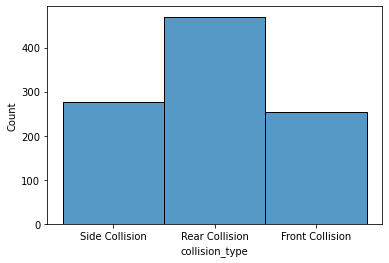

In [104]:
sns.histplot(data = df, x = 'collision_type')

<AxesSubplot:xlabel='property_damage', ylabel='Count'>

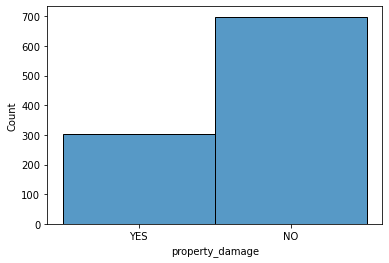

In [105]:
sns.histplot(data = df, x = 'property_damage')

<AxesSubplot:xlabel='police_report_available', ylabel='Count'>

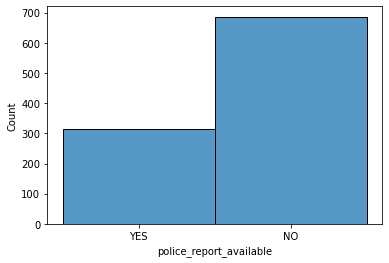

In [106]:
sns.histplot(data = df, x = 'police_report_available')

### Notes: Dari hasil plot histogram untuk kolom yang dilakukan replacement Null dengan nilai Mode nya, terlihat terjadi pemusatan pada kolom yang mengalami distribusi yang abnormal

### Langkah berikutnya adalah melakukan Feature Selection

In [107]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


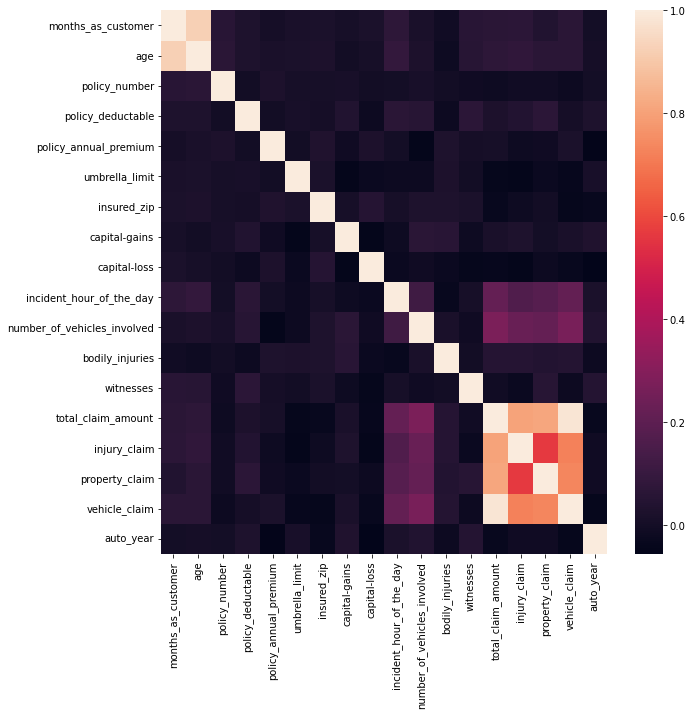

In [108]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df.corr())
plt.show()

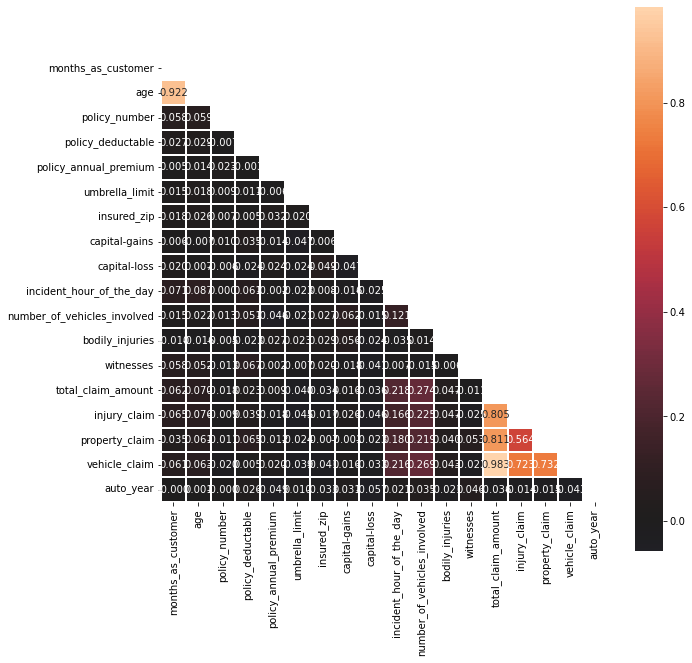

In [109]:
fig = plt.figure(figsize = (10,10))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), center = 0,
           fmt='.3f', square = True,
           annot = True, linewidth = 0.3, mask = matrix)
plt.show()

### Notes: Dari analisa korelasi antara variable independent, terdapat korelasi yang cukup kuat yang disebabkan oleh variable / kolom 'age', 'total_claim_amount', dan 'vehicle_claim'. Maka untuk selanjutnya, ketiga kolom tersebut akan dihapuskan dari dataset.

In [110]:
df.drop(['age','total_claim_amount', 'vehicle_claim'], axis='columns', inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_number                1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [113]:
df.head()

,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,6510,13020,Saab,92x,2004,Y
1,228,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,780,780,Mercedes,E400,2007,Y
2,134,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,7700,3850,Dodge,RAM,2007,N
3,256,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,6340,6340,Chevrolet,Tahoe,2014,Y
4,228,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,1300,650,Accura,RSX,2009,N


In [ ]:
df[]